In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load the data
df = pd.read_csv('OUSD_schools.csv')

# Initial exploration
print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("Column Names and Types:")
print(df.dtypes)
print("\n" + "="*50)
print("First few rows:")
print(df.head())
print("\n" + "="*50)
print("Summary Statistics:")
print(df.describe())
print("\n" + "="*50)
print("Missing Values:")
print(df.isnull().sum())

Dataset Shape: (77, 5)

Column Names and Types:
School Name    object
Grades         object
Address        object
School Type    object
Size            int64
dtype: object

First few rows:
                         School Name                Grades  \
0   ACORN Woodland Elementary School      K, 1, 2, 3, 4, 5   
1        Allendale Elementary School  TK, K, 1, 2, 3, 4, 5   
2      Bella Vista Elementary School  TK, K, 1, 2, 3, 4, 5   
3           Bret Harte Middle School               6, 7, 8   
4  Bridges Academy Elementary School  TK, K, 1, 2, 3, 4, 5   

                             Address    School Type  Size  
0      1025 81st Avenue, Oakland, CA     Elementary   291  
1  3670 Penniman Avenue, Oakland, CA     Elementary   374  
2    1025 E 28th Street, Oakland, CA     Elementary   349  
3  3700 Coolidge Avenue, Oakland, CA  Middle School   417  
4      1325 53rd Avenue, Oakland, CA     Elementary   423  

Summary Statistics:
              Size
count    77.000000
mean    435.194805


/var/folders/vx/xc7347n175s50g85_65zycxc0000gn/T/ipykernel_7955/3695174646.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=school_counts.index, y=school_counts.values, palette='viridis')


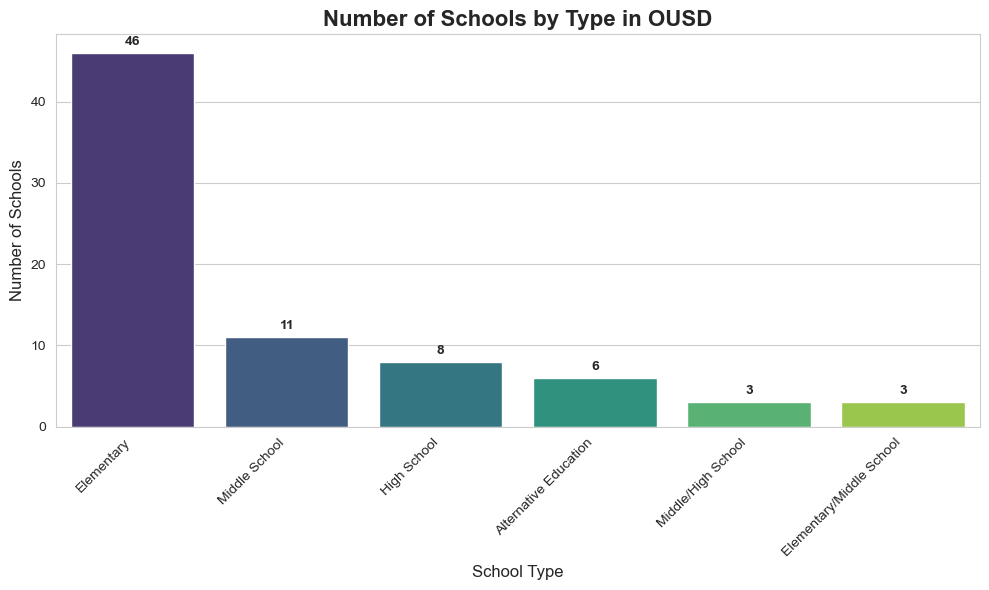

/var/folders/vx/xc7347n175s50g85_65zycxc0000gn/T/ipykernel_7955/3695174646.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_size.index, y=avg_size.values, palette='coolwarm')


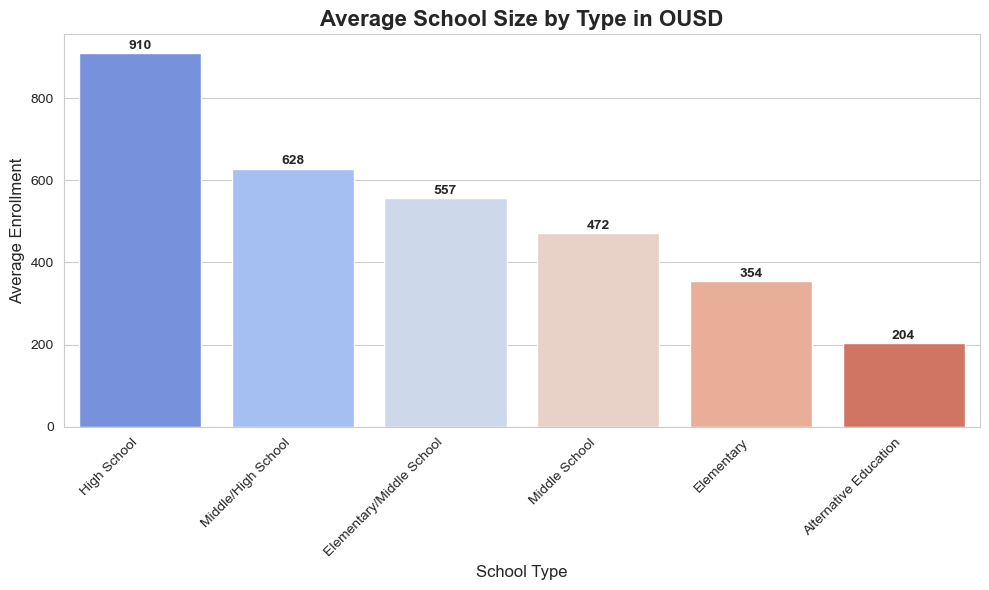

/var/folders/vx/xc7347n175s50g85_65zycxc0000gn/T/ipykernel_7955/3695174646.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='School Type', y='Size', palette='Set2')


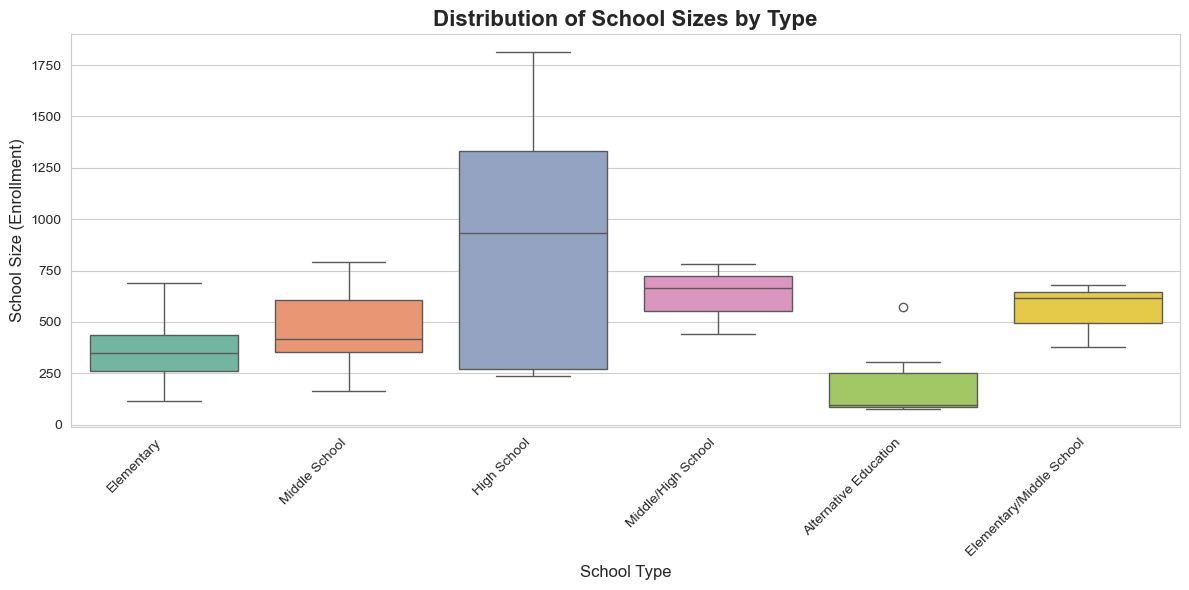

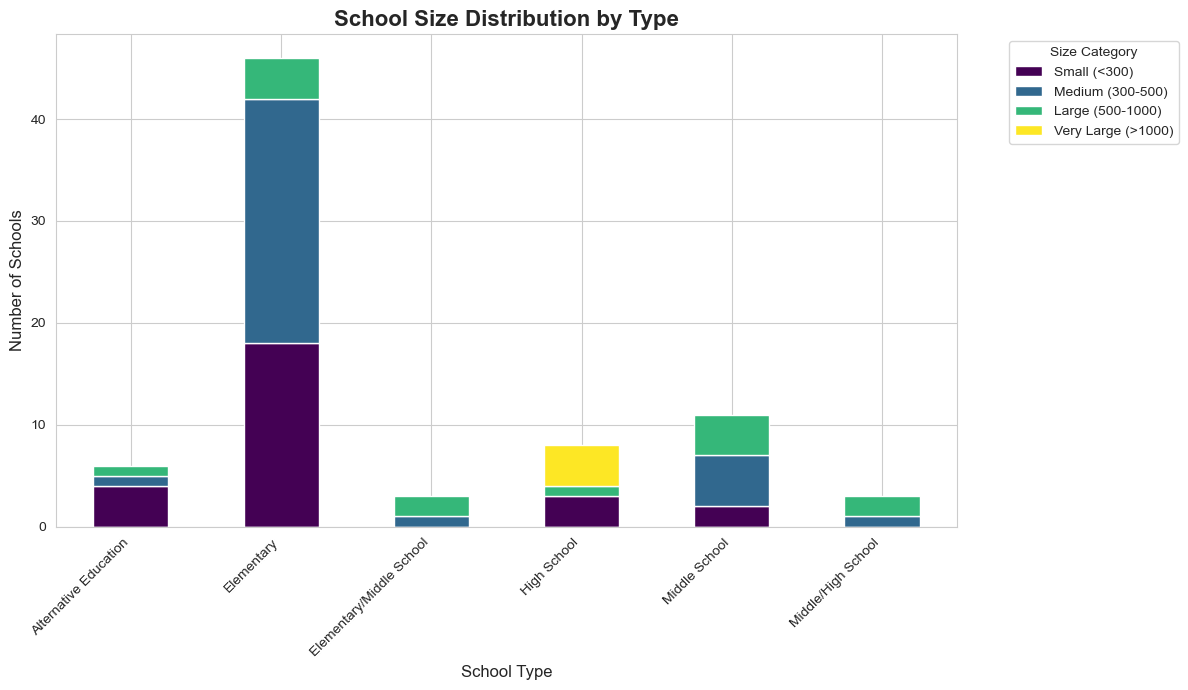


SUMMARY STATISTICS BY SCHOOL TYPE
                          Count  Mean Size  Median Size  Min Size  Max Size  \
School Type                                                                   
Alternative Education         6      204.0         94.0        77       573   
Elementary                   46      354.0        350.0       114       687   
Elementary/Middle School      3      557.0        616.0       376       678   
High School                   8      910.0        932.0       237      1812   
Middle School                11      472.0        417.0       165       791   
Middle/High School            3      628.0        664.0       441       780   

                          Std Dev  
School Type                        
Alternative Education       201.0  
Elementary                  130.0  
Elementary/Middle School    160.0  
High School                 629.0  
Middle School               198.0  
Middle/High School          172.0  


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data with correct filename
df = pd.read_csv('OUSD_schools.csv')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. COUNT BY SCHOOL TYPE (Bar Chart)
plt.figure(figsize=(10, 6))
school_counts = df['School Type'].value_counts()
sns.barplot(x=school_counts.index, y=school_counts.values, palette='viridis')
plt.title('Number of Schools by Type in OUSD', fontsize=16, fontweight='bold')
plt.xlabel('School Type', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(school_counts.values):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('schools_by_type.png', dpi=300)
plt.show()

# 2. AVERAGE SIZE BY SCHOOL TYPE (Bar Chart)
plt.figure(figsize=(10, 6))
avg_size = df.groupby('School Type')['Size'].mean().sort_values(ascending=False)
sns.barplot(x=avg_size.index, y=avg_size.values, palette='coolwarm')
plt.title('Average School Size by Type in OUSD', fontsize=16, fontweight='bold')
plt.xlabel('School Type', fontsize=12)
plt.ylabel('Average Enrollment', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(avg_size.values):
    plt.text(i, v + 10, f'{v:.0f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('avg_size_by_type.png', dpi=300)
plt.show()

# 3. DISTRIBUTION OF SCHOOL SIZES BY TYPE (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='School Type', y='Size', palette='Set2')
plt.title('Distribution of School Sizes by Type', fontsize=16, fontweight='bold')
plt.xlabel('School Type', fontsize=12)
plt.ylabel('School Size (Enrollment)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('size_distribution_by_type.png', dpi=300)
plt.show()

# 4. SCHOOL SIZE CATEGORIES BY TYPE (Stacked Bar)
# Create size categories
df['Size Category'] = pd.cut(df['Size'], 
                              bins=[0, 300, 500, 1000, 5000],
                              labels=['Small (<300)', 'Medium (300-500)', 
                                     'Large (500-1000)', 'Very Large (>1000)'])

size_type_crosstab = pd.crosstab(df['School Type'], df['Size Category'])

plt.figure(figsize=(12, 7))
size_type_crosstab.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('School Size Distribution by Type', fontsize=16, fontweight='bold')
plt.xlabel('School Type', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.legend(title='Size Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('size_categories_by_type.png', dpi=300)
plt.show()

# 5. SUMMARY STATISTICS TABLE
summary_stats = df.groupby('School Type').agg({
    'Size': ['count', 'mean', 'median', 'min', 'max', 'std']
}).round(0)
summary_stats.columns = ['Count', 'Mean Size', 'Median Size', 'Min Size', 'Max Size', 'Std Dev']
print("\n" + "="*80)
print("SUMMARY STATISTICS BY SCHOOL TYPE")
print("="*80)
print(summary_stats)
print("="*80)

# Save to CSV
summary_stats.to_csv('summary_by_school_type.csv')

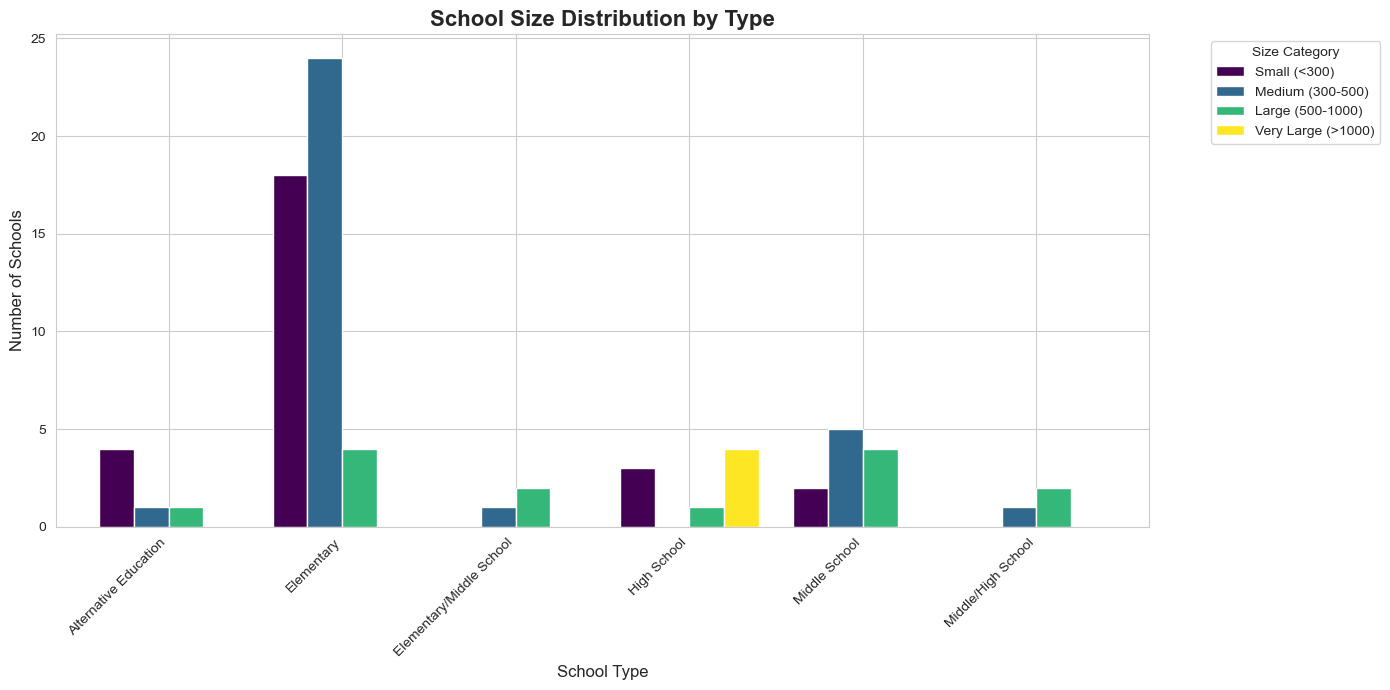

<Figure size 1400x700 with 0 Axes>

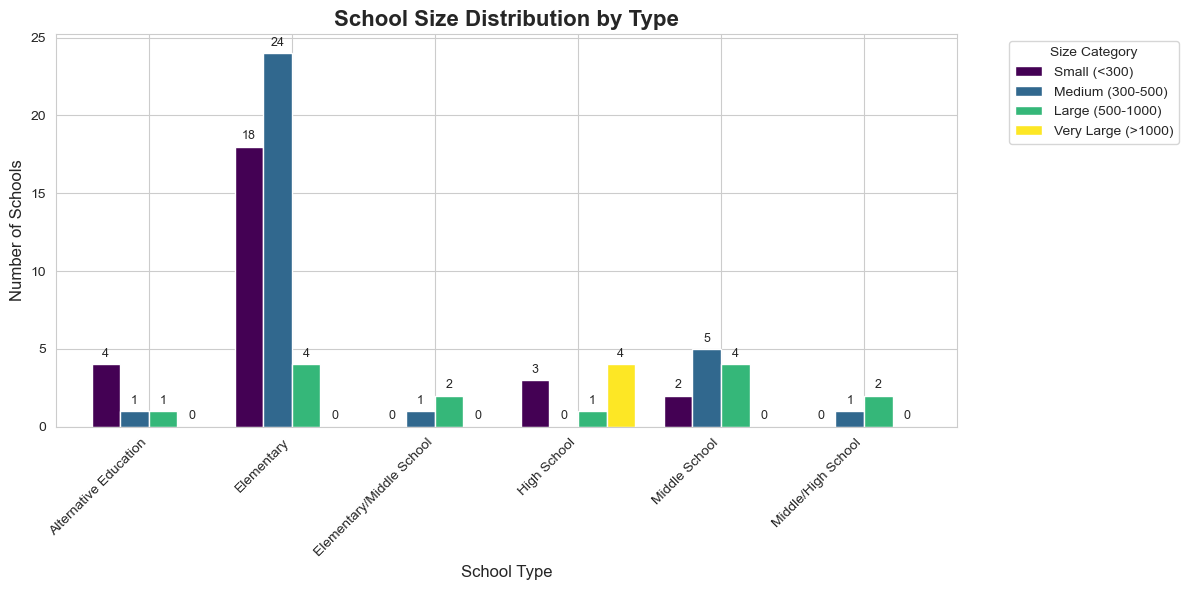

In [7]:
# Load your data
df = pd.read_csv('OUSD_schools.csv')

# Set style
sns.set_style("whitegrid")

# Create size categories
df['Size Category'] = pd.cut(df['Size'], 
                              bins=[0, 300, 500, 1000, 5000],
                              labels=['Small (<300)', 'Medium (300-500)', 
                                     'Large (500-1000)', 'Very Large (>1000)'])

# Create crosstab
size_type_crosstab = pd.crosstab(df['School Type'], df['Size Category'])

# SIDE-BY-SIDE BAR CHART
plt.figure(figsize=(14, 7))
size_type_crosstab.plot(kind='bar', stacked=False, colormap='viridis', ax=plt.gca(), width=0.8)
plt.title('School Size Distribution by Type', fontsize=16, fontweight='bold')
plt.xlabel('School Type', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.legend(title='Size Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('size_categories_by_type_sidebyside.png', dpi=300, bbox_inches='tight')
plt.show()

# Optional: Add value labels on bars
plt.figure(figsize=(14, 7))
ax = size_type_crosstab.plot(kind='bar', stacked=False, colormap='viridis', width=0.8)
plt.title('School Size Distribution by Type', fontsize=16, fontweight='bold')
plt.xlabel('School Type', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.legend(title='Size Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=9, padding=3)

plt.tight_layout()
plt.savefig('size_categories_by_type_sidebyside_labeled.png', dpi=300, bbox_inches='tight')
plt.show()


SCHOOLS BY AREA:
Area
Central Oakland    59
East Oakland       10
West Oakland        8
Name: count, dtype: int64


<Figure size 1400x700 with 0 Axes>

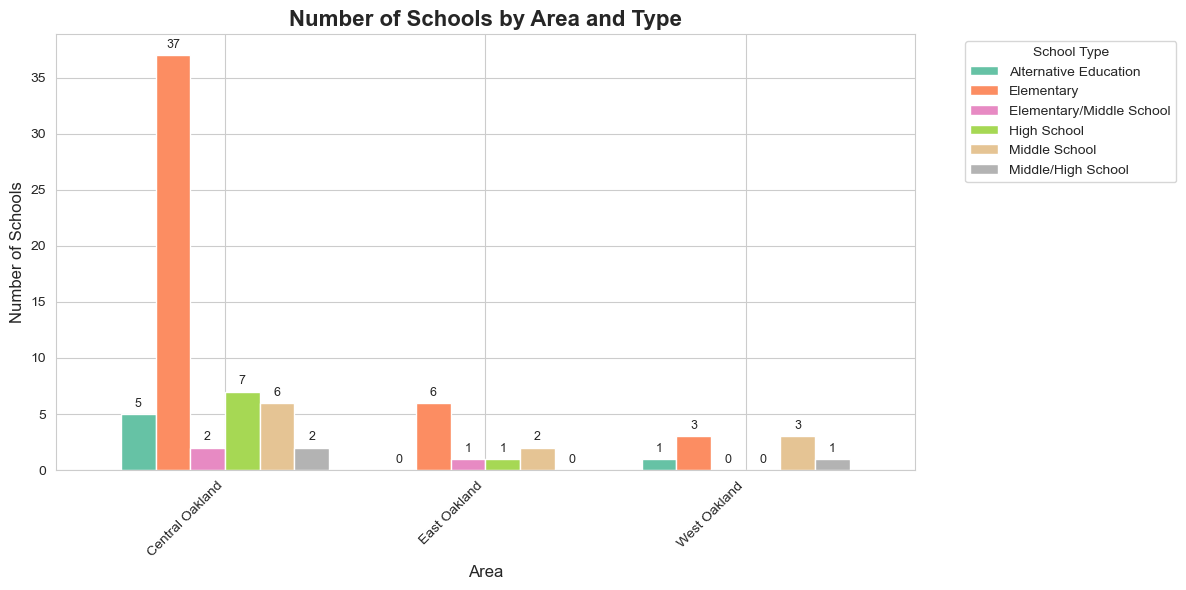

<Figure size 1400x700 with 0 Axes>

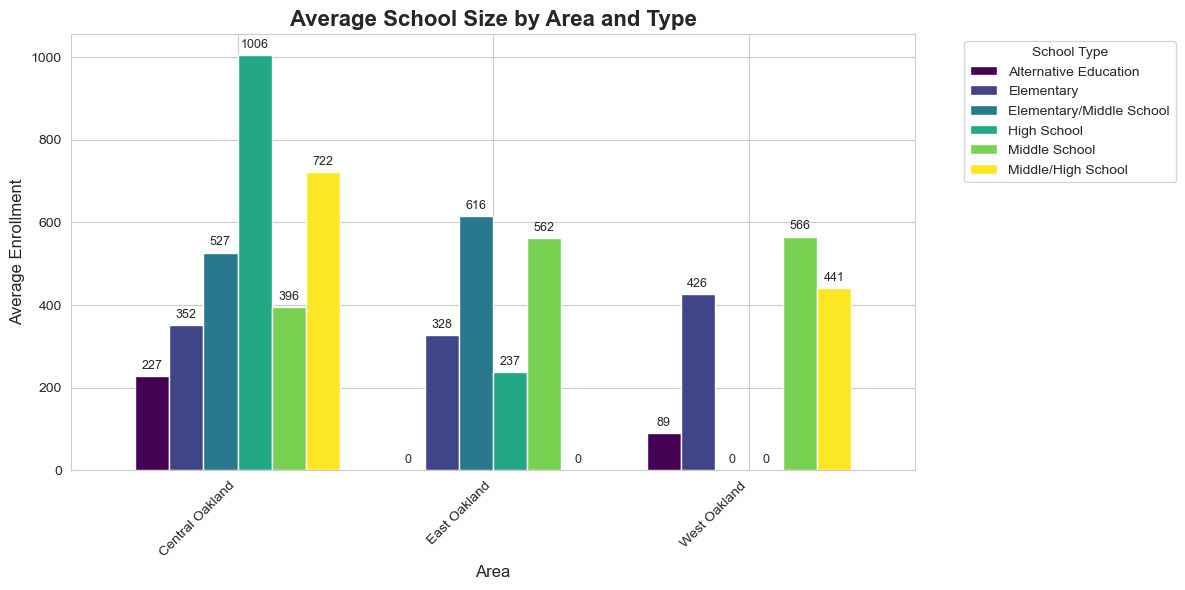

<Figure size 1400x700 with 0 Axes>

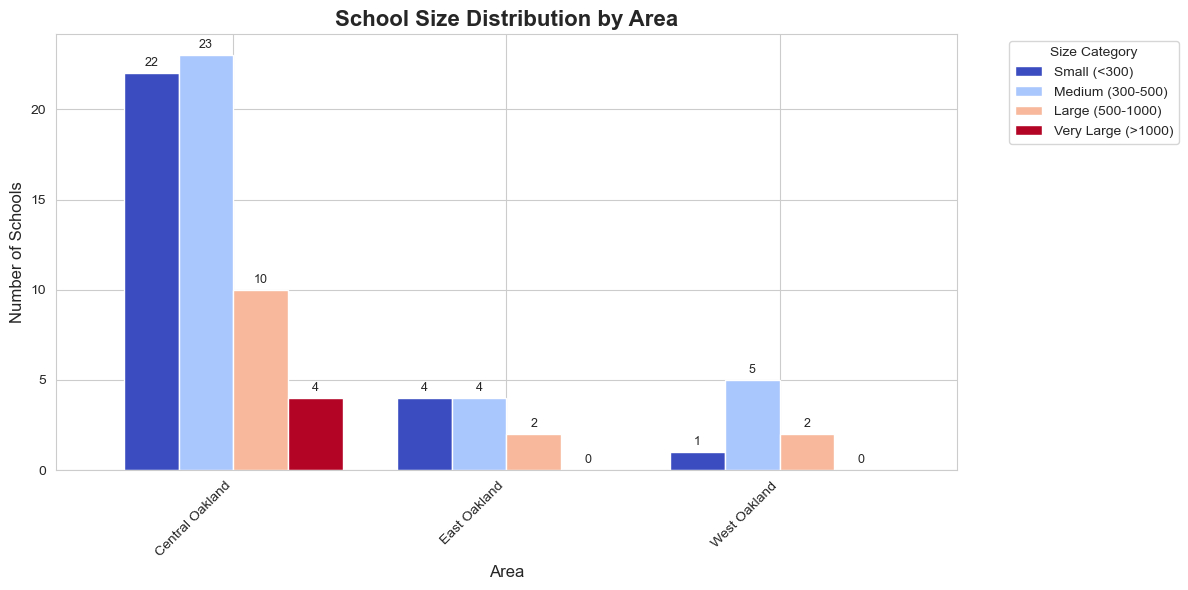


SUMMARY STATISTICS BY AREA
                 Total Schools  Mean Size  Median Size  Min Size  Max Size
Area                                                                      
Central Oakland             59      442.0        355.0        77      1812
East Oakland                10      394.0        360.0       176       752
West Oakland                 8      438.0        427.0        89       791


In [9]:
import re
# Load your data
df = pd.read_csv('OUSD_schools.csv')

# Set style
sns.set_style("whitegrid")

# EXTRACT AREA FROM ADDRESS
# Option 1: Extract East/West/North/South from street names
def extract_area(address):
    if pd.isna(address):
        return 'Unknown'
    # Check for directional indicators in street names
    if re.search(r'\bE\b|\bEast\b', address, re.IGNORECASE):
        return 'East Oakland'
    elif re.search(r'\bW\b|\bWest\b', address, re.IGNORECASE):
        return 'West Oakland'
    elif re.search(r'\bN\b|\bNorth\b', address, re.IGNORECASE):
        return 'North Oakland'
    elif re.search(r'\bS\b|\bSouth\b', address, re.IGNORECASE):
        return 'South Oakland'
    else:
        return 'Central Oakland'

df['Area'] = df['Address'].apply(extract_area)

# Option 2: Extract by street number ranges (more precise for Oakland)
def extract_area_by_avenue(address):
    if pd.isna(address):
        return 'Unknown'
    
    # Extract avenue/street numbers
    match = re.search(r'(\d+)(?:st|nd|rd|th)?\s+Avenue', address, re.IGNORECASE)
    if match:
        num = int(match.group(1))
        if num < 40:
            return 'West Oakland'
        elif 40 <= num < 80:
            return 'Central Oakland'
        else:
            return 'East Oakland'
    
    # Default to directional if no avenue number
    return extract_area(address)

df['Area'] = df['Address'].apply(extract_area_by_avenue)

# Print area distribution to verify
print("\n" + "="*50)
print("SCHOOLS BY AREA:")
print(df['Area'].value_counts())
print("="*50)

# 1. SCHOOL COUNT BY AREA AND TYPE (Side-by-side bars)
plt.figure(figsize=(14, 7))
area_type_crosstab = pd.crosstab(df['Area'], df['School Type'])
ax = area_type_crosstab.plot(kind='bar', stacked=False, colormap='Set2', width=0.8)
plt.title('Number of Schools by Area and Type', fontsize=16, fontweight='bold')
plt.xlabel('Area', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fontsize=9, padding=3)

plt.tight_layout()
plt.savefig('schools_by_area_and_type.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. AVERAGE SIZE BY AREA AND TYPE
plt.figure(figsize=(14, 7))
avg_size_area = df.groupby(['Area', 'School Type'])['Size'].mean().unstack()
ax = avg_size_area.plot(kind='bar', stacked=False, colormap='viridis', width=0.8)
plt.title('Average School Size by Area and Type', fontsize=16, fontweight='bold')
plt.xlabel('Area', fontsize=12)
plt.ylabel('Average Enrollment', fontsize=12)
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9, padding=3)

plt.tight_layout()
plt.savefig('avg_size_by_area_and_type.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. SIZE DISTRIBUTION BY AREA
df['Size Category'] = pd.cut(df['Size'], 
                              bins=[0, 300, 500, 1000, 5000],
                              labels=['Small (<300)', 'Medium (300-500)', 
                                     'Large (500-1000)', 'Very Large (>1000)'])

plt.figure(figsize=(14, 7))
area_size_crosstab = pd.crosstab(df['Area'], df['Size Category'])
ax = area_size_crosstab.plot(kind='bar', stacked=False, colormap='coolwarm', width=0.8)
plt.title('School Size Distribution by Area', fontsize=16, fontweight='bold')
plt.xlabel('Area', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.legend(title='Size Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fontsize=9, padding=3)

plt.tight_layout()
plt.savefig('size_distribution_by_area.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. SUMMARY TABLE BY AREA
summary_by_area = df.groupby('Area').agg({
    'School Name': 'count',
    'Size': ['mean', 'median', 'min', 'max']
}).round(0)
summary_by_area.columns = ['Total Schools', 'Mean Size', 'Median Size', 'Min Size', 'Max Size']
print("\n" + "="*80)
print("SUMMARY STATISTICS BY AREA")
print("="*80)
print(summary_by_area)
print("="*80)

# Save results
summary_by_area.to_csv('summary_by_area.csv')
area_type_crosstab.to_csv('schools_by_area_and_type.csv')


OVERALL DATASET SUMMARY
Total Number of Schools: 77
Total Enrollment: 33,510
Average School Size: 435
Median School Size: 374
Size Range: 77 - 1812

SCHOOLS BY AREA
                 # Schools  Total Enrollment  Mean Size  Median Size  \
Area                                                                   
Central Oakland         59             26062      442.0        355.0   
East Oakland            10              3941      394.0        360.0   
West Oakland             8              3507      438.0        427.0   

                 Min Size  Max Size  Std Dev  
Area                                          
Central Oakland        77      1812    329.0  
East Oakland          176       752    175.0  
West Oakland           89       791    197.0  

SCHOOLS BY TYPE
                          # Schools  Total Enrollment  Mean Size  Median Size  \
School Type                                                                     
Alternative Education             6              1223      

<Figure size 1400x700 with 0 Axes>

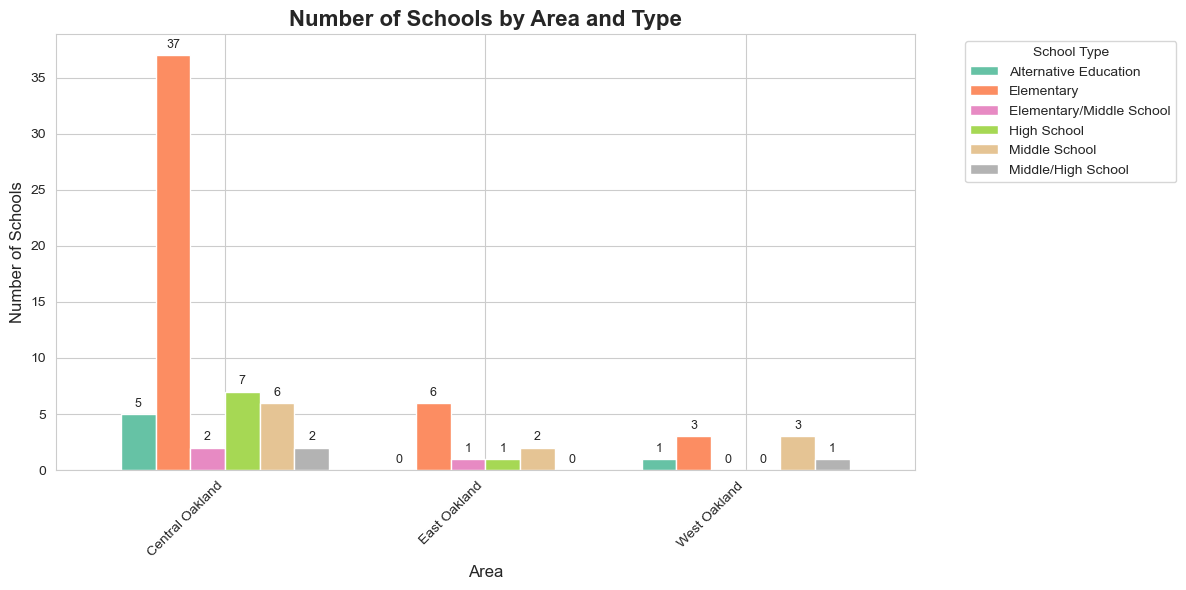

<Figure size 1400x700 with 0 Axes>

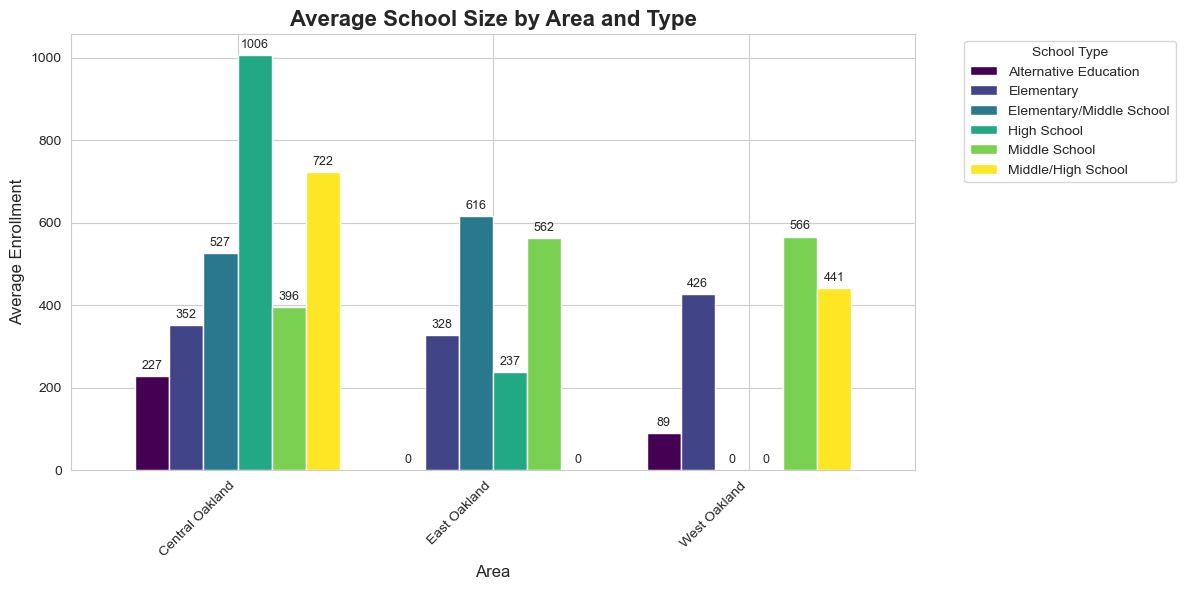

<Figure size 1400x700 with 0 Axes>

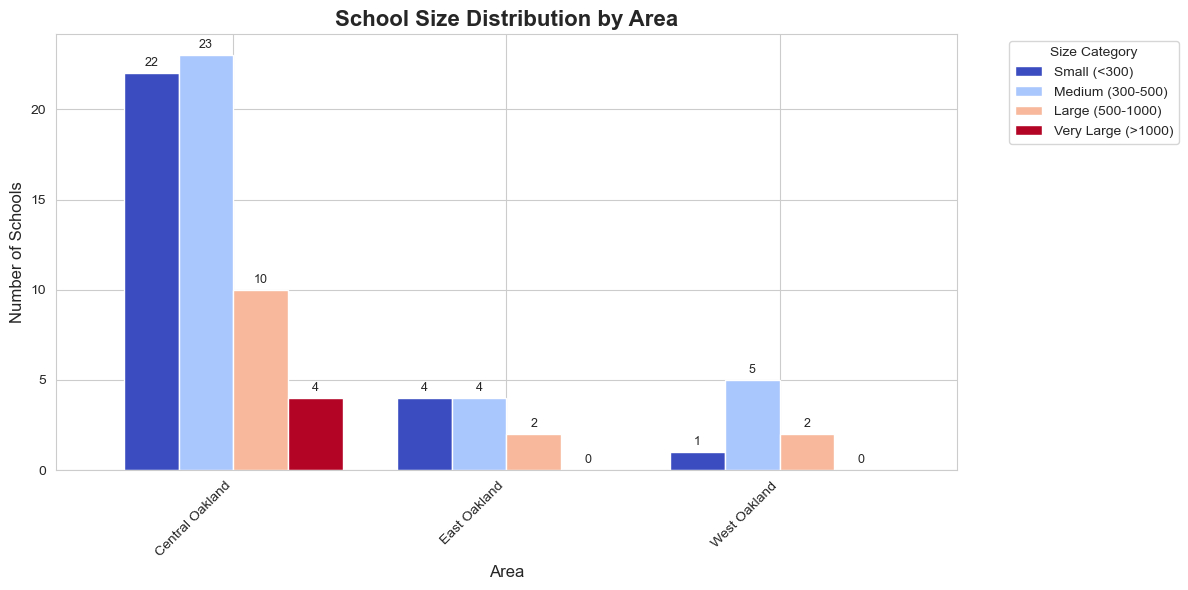

<Figure size 1400x700 with 0 Axes>

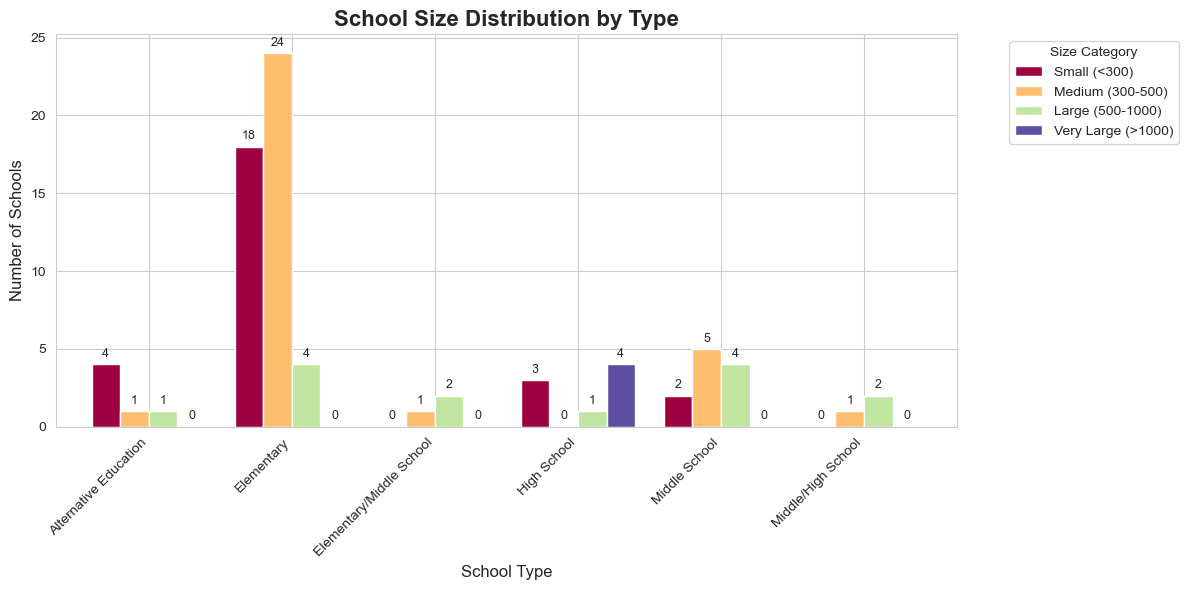


✓ All visualizations saved as PNG files

Files created:
  - OUSD_analysis_summary.xlsx (all statistics)
  - schools_by_area_and_type.png
  - avg_size_by_area_and_type.png
  - size_distribution_by_area.png
  - size_distribution_by_type.png


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load your data
df = pd.read_csv('OUSD_schools.csv')

# Set style
sns.set_style("whitegrid")

# EXTRACT AREA FROM ADDRESS
def extract_area_by_avenue(address):
    if pd.isna(address):
        return 'Unknown'
    
    # Extract avenue/street numbers
    match = re.search(r'(\d+)(?:st|nd|rd|th)?\s+Avenue', address, re.IGNORECASE)
    if match:
        num = int(match.group(1))
        if num < 40:
            return 'West Oakland'
        elif 40 <= num < 80:
            return 'Central Oakland'
        else:
            return 'East Oakland'
    
    # Default to directional if no avenue number
    if re.search(r'\bE\b|\bEast\b', address, re.IGNORECASE):
        return 'East Oakland'
    elif re.search(r'\bW\b|\bWest\b', address, re.IGNORECASE):
        return 'West Oakland'
    elif re.search(r'\bN\b|\bNorth\b', address, re.IGNORECASE):
        return 'North Oakland'
    elif re.search(r'\bS\b|\bSouth\b', address, re.IGNORECASE):
        return 'South Oakland'
    else:
        return 'Central Oakland'

df['Area'] = df['Address'].apply(extract_area_by_avenue)

# Create size categories
df['Size Category'] = pd.cut(df['Size'], 
                              bins=[0, 300, 500, 1000, 5000],
                              labels=['Small (<300)', 'Medium (300-500)', 
                                     'Large (500-1000)', 'Very Large (>1000)'])

# ============================================================================
# SUMMARY STATISTICS
# ============================================================================

print("\n" + "="*80)
print("OVERALL DATASET SUMMARY")
print("="*80)
print(f"Total Number of Schools: {len(df)}")
print(f"Total Enrollment: {df['Size'].sum():,.0f}")
print(f"Average School Size: {df['Size'].mean():.0f}")
print(f"Median School Size: {df['Size'].median():.0f}")
print(f"Size Range: {df['Size'].min():.0f} - {df['Size'].max():.0f}")
print("="*80)

print("\n" + "="*80)
print("SCHOOLS BY AREA")
print("="*80)
area_summary = df.groupby('Area').agg({
    'School Name': 'count',
    'Size': ['sum', 'mean', 'median', 'min', 'max', 'std']
}).round(0)
area_summary.columns = ['# Schools', 'Total Enrollment', 'Mean Size', 'Median Size', 'Min Size', 'Max Size', 'Std Dev']
print(area_summary)
print("="*80)

print("\n" + "="*80)
print("SCHOOLS BY TYPE")
print("="*80)
type_summary = df.groupby('School Type').agg({
    'School Name': 'count',
    'Size': ['sum', 'mean', 'median', 'min', 'max', 'std']
}).round(0)
type_summary.columns = ['# Schools', 'Total Enrollment', 'Mean Size', 'Median Size', 'Min Size', 'Max Size', 'Std Dev']
print(type_summary)
print("="*80)

print("\n" + "="*80)
print("SCHOOLS BY AREA AND TYPE (COUNT)")
print("="*80)
area_type_crosstab = pd.crosstab(df['Area'], df['School Type'], margins=True)
print(area_type_crosstab)
print("="*80)

print("\n" + "="*80)
print("AVERAGE SIZE BY AREA AND TYPE")
print("="*80)
avg_size_pivot = df.pivot_table(values='Size', index='Area', columns='School Type', aggfunc='mean').round(0)
print(avg_size_pivot)
print("="*80)

print("\n" + "="*80)
print("SIZE DISTRIBUTION BY AREA (COUNT)")
print("="*80)
area_size_crosstab = pd.crosstab(df['Area'], df['Size Category'], margins=True)
print(area_size_crosstab)
print("="*80)

print("\n" + "="*80)
print("SIZE DISTRIBUTION BY TYPE (COUNT)")
print("="*80)
type_size_crosstab = pd.crosstab(df['School Type'], df['Size Category'], margins=True)
print(type_size_crosstab)
print("="*80)

# ============================================================================
# SAVE ALL STATISTICS TO CSV
# ============================================================================

# Create Excel writer for multiple sheets
with pd.ExcelWriter('OUSD_analysis_summary.xlsx', engine='openpyxl') as writer:
    area_summary.to_excel(writer, sheet_name='By Area')
    type_summary.to_excel(writer, sheet_name='By Type')
    area_type_crosstab.to_excel(writer, sheet_name='Area x Type Count')
    avg_size_pivot.to_excel(writer, sheet_name='Area x Type Avg Size')
    area_size_crosstab.to_excel(writer, sheet_name='Area x Size Category')
    type_size_crosstab.to_excel(writer, sheet_name='Type x Size Category')
    df.to_excel(writer, sheet_name='Full Data', index=False)

print("\n✓ All statistics saved to 'OUSD_analysis_summary.xlsx'")

# ============================================================================
# VISUALIZATIONS
# ============================================================================

# 1. SCHOOL COUNT BY AREA AND TYPE
plt.figure(figsize=(14, 7))
ax = area_type_crosstab.drop('All', axis=0).drop('All', axis=1).plot(
    kind='bar', stacked=False, colormap='Set2', width=0.8
)
plt.title('Number of Schools by Area and Type', fontsize=16, fontweight='bold')
plt.xlabel('Area', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
for container in ax.containers:
    ax.bar_label(container, fontsize=9, padding=3)
plt.tight_layout()
plt.savefig('schools_by_area_and_type.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. AVERAGE SIZE BY AREA AND TYPE
plt.figure(figsize=(14, 7))
ax = avg_size_pivot.plot(kind='bar', stacked=False, colormap='viridis', width=0.8)
plt.title('Average School Size by Area and Type', fontsize=16, fontweight='bold')
plt.xlabel('Area', fontsize=12)
plt.ylabel('Average Enrollment', fontsize=12)
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9, padding=3)
plt.tight_layout()
plt.savefig('avg_size_by_area_and_type.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. SIZE DISTRIBUTION BY AREA
plt.figure(figsize=(14, 7))
ax = area_size_crosstab.drop('All', axis=0).drop('All', axis=1).plot(
    kind='bar', stacked=False, colormap='coolwarm', width=0.8
)
plt.title('School Size Distribution by Area', fontsize=16, fontweight='bold')
plt.xlabel('Area', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.legend(title='Size Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
for container in ax.containers:
    ax.bar_label(container, fontsize=9, padding=3)
plt.tight_layout()
plt.savefig('size_distribution_by_area.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. SIZE DISTRIBUTION BY TYPE
plt.figure(figsize=(14, 7))
ax = type_size_crosstab.drop('All', axis=0).drop('All', axis=1).plot(
    kind='bar', stacked=False, colormap='Spectral', width=0.8
)
plt.title('School Size Distribution by Type', fontsize=16, fontweight='bold')
plt.xlabel('School Type', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.legend(title='Size Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
for container in ax.containers:
    ax.bar_label(container, fontsize=9, padding=3)
plt.tight_layout()
plt.savefig('size_distribution_by_type.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ All visualizations saved as PNG files")
print("\nFiles created:")
print("  - OUSD_analysis_summary.xlsx (all statistics)")
print("  - schools_by_area_and_type.png")
print("  - avg_size_by_area_and_type.png")
print("  - size_distribution_by_area.png")
print("  - size_distribution_by_type.png")